Analiza FFT

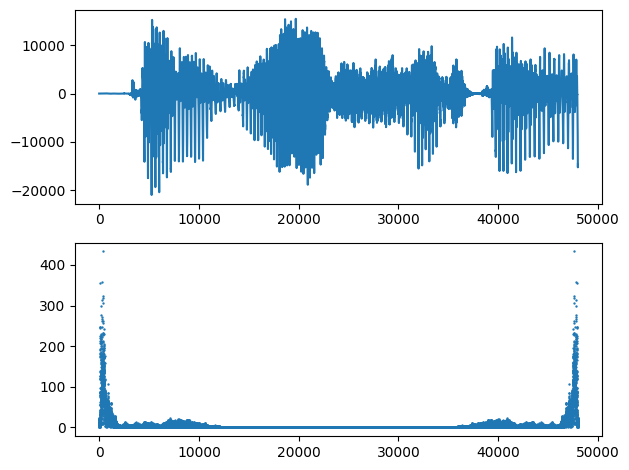

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.io import wavfile
import os
import pandas as pd

path = 'voices'
if not os.path.exists(path):
    os.makedirs(path)

files = os.listdir(path)
fs = 16000
seconds = 3
num_samples = fs * seconds
X_raw = np.zeros((len(files), num_samples))

# Load data with truncation or padding
for i, file in enumerate(files):
    data = wavfile.read(f"{path}/{file}")[1]
    # Truncate if longer, pad if shorter
    if data.shape[0] > num_samples:
        X_raw[i, :] = data[:num_samples]
    else:
        X_raw[i, :data.shape[0]] = data

y = pd.read_csv('voice_extracted_features.csv', sep=';').values

# FFT processing
X_fft = np.abs(fft(X_raw, axis=-1)) / X_raw.shape[1]
low_cut = 50 * seconds
hight_cut = 280 * seconds
X_fft_cut = X_fft[:, low_cut:hight_cut]

# Plotting
fig, ax = plt.subplots(2, 1)
ax = ax.ravel()  # Ensure ax is an array

# Plot raw data
ax[0].plot(np.arange(X_raw.shape[1]), X_raw[0, :])

# Plot FFT data
ax[1].scatter(np.arange(X_fft.shape[1]), X_fft[0, :], s=0.5)

fig.tight_layout()
plt.show()



Zmniejszenie rozdzielczości widma

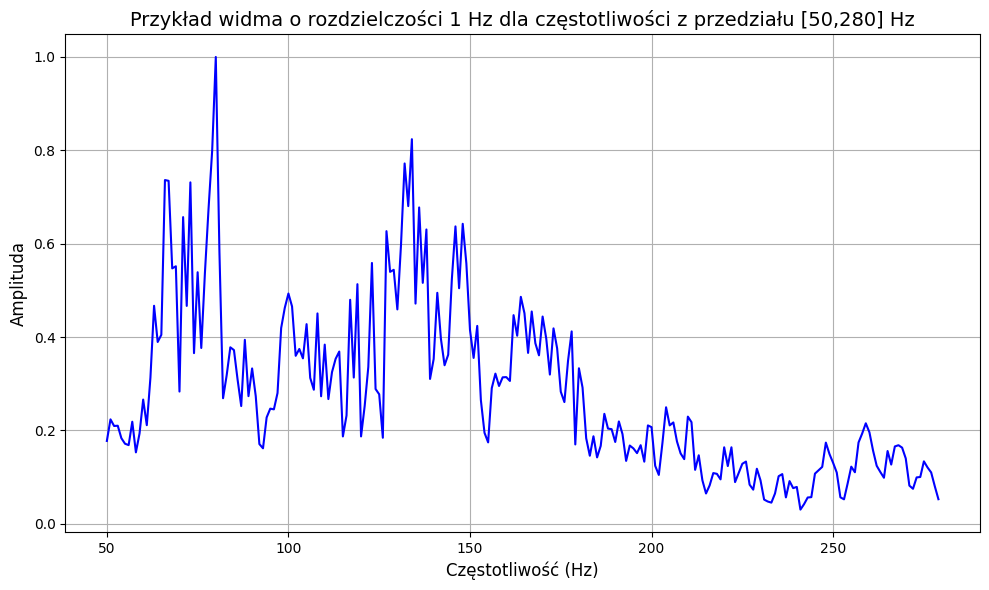

In [20]:
# Apply downsampling by averaging over segments of mean_num
mean_num = 3
X_fft = np.reshape(X_fft, (X_fft.shape[0], X_fft.shape[1] // mean_num, mean_num))
X_fft = X_fft.mean(axis=-1)  # Take the mean across the last axis

# Apply frequency range selection and normalization
low_cut = 50  # Lower frequency bound
high_cut = 280  # Upper frequency bound
X_fft_cut = X_fft[:, low_cut:high_cut]
X_fft_cut = X_fft_cut / np.expand_dims(X_fft_cut.max(axis=1), axis=-1)  # Normalize each row

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Single plot for the processed FFT

# Plot processed FFT data (normalized) for the first sample in the specified range
ax.plot(np.arange(low_cut, high_cut), X_fft_cut[0, :], color='blue')
ax.set_title("Przykład widma o rozdzielczości 1 Hz dla częstotliwości z przedziału [50,280] Hz", fontsize=14)
ax.set_xlabel("Częstotliwość (Hz)", fontsize=12)
ax.set_ylabel("Amplituda", fontsize=12)
ax.grid(True)

fig.tight_layout()
plt.show()
